In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plt.style.use('bmh')

plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14

myFmt = mdates.DateFormatter('%Y-%m-%D') # here you can format your datetick labels as desired


In [2]:
data = pd.read_csv("Prepared Datasets\Mar2019Aug2019rs1h.csv")

data.datetime = pd.to_datetime(data.datetime)
data.set_index('datetime', inplace=True)

In [3]:
data.columns

Index(['air_temp_ext1', 'apperture_ext1', 'aprtr_change_ext1', 'air_temp_ext2',
       'apperture_ext2', 'aprtr_change_ext2', 't1_rta', 't2_rta', 't3_rta',
       't4_rta', 't5_rta', 't6_rta', 't7_rta', 't8_rta', 't9_rta', 't11_rta',
       'air_temp_ib_facade', 'r_humid_ib_facade', 'air_temp_ib_roof',
       'r_humid_ib_roof'],
      dtype='object')

<AxesSubplot:xlabel='datetime'>

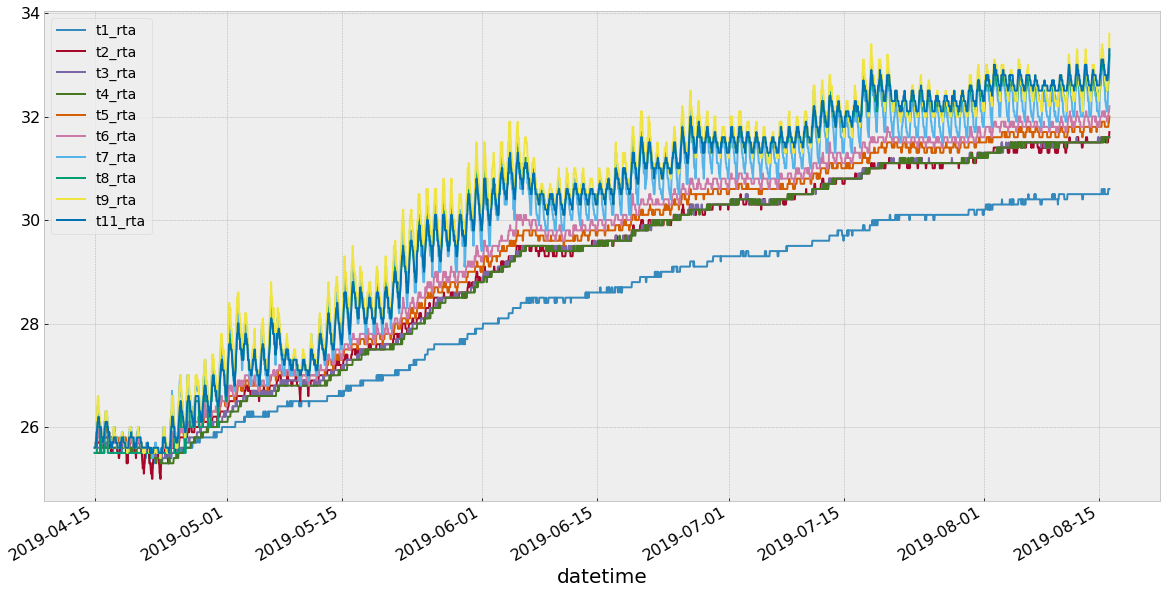

In [4]:
rta_cs = [x for x in data.columns if x.__contains__('rta')]
data.loc[:,rta_cs].plot()

In [5]:
data['jump_mag_ext1']= data.apperture_ext1.diff().apply(lambda x: x if abs(x) > 2*data.aprtr_change_ext1.std() else np.nan).dropna()
data['jump_mag_ext2'] = data.apperture_ext2.diff().apply(lambda x: x if abs(x) > 2*data.apperture_ext2.diff().std() else np.nan).dropna()

data['is_jump_ext1'] = np.abs(data['jump_mag_ext1']) > 0
data['is_jump_ext2'] = np.abs(data['jump_mag_ext2']) > 0

In [6]:
x = data.air_temp_ext1
y = data.aprtr_change_ext1

In [7]:
# Prepare Datasets for Each Model
# Define a model

In [14]:
import Modeling as mod

data_pp = mod.Data_Preprocessor()

x = np.random.random((100,2))
x


array([[0.94463413, 0.10137274],
       [0.1454021 , 0.93830144],
       [0.72537305, 0.32607767],
       [0.94780359, 0.88762941],
       [0.15214827, 0.79876065],
       [0.44919723, 0.64722902],
       [0.09508345, 0.82615796],
       [0.49849564, 0.87386151],
       [0.94831554, 0.07235863],
       [0.0482482 , 0.31993955],
       [0.03051183, 0.44908001],
       [0.20473866, 0.32339927],
       [0.41611943, 0.17761127],
       [0.47984816, 0.44844728],
       [0.03998953, 0.57054716],
       [0.89083239, 0.15293543],
       [0.34171825, 0.83191431],
       [0.16970797, 0.15605785],
       [0.17923083, 0.07576103],
       [0.40257442, 0.02213885],
       [0.23607395, 0.35201618],
       [0.12275033, 0.40767789],
       [0.40673695, 0.89068158],
       [0.25582682, 0.51193978],
       [0.40837664, 0.25933547],
       [0.81210377, 0.62906877],
       [0.02302806, 0.90997809],
       [0.26189741, 0.64702771],
       [0.41896912, 0.08878525],
       [0.54747353, 0.25801661],
       [0.

array([[[0.94463413, 0.10137274],
        [0.1454021 , 0.93830144],
        [0.72537305, 0.32607767],
        [0.94780359, 0.88762941],
        [0.15214827, 0.79876065]],

       [[0.1454021 , 0.93830144],
        [0.72537305, 0.32607767],
        [0.94780359, 0.88762941],
        [0.15214827, 0.79876065],
        [0.44919723, 0.64722902]],

       [[0.72537305, 0.32607767],
        [0.94780359, 0.88762941],
        [0.15214827, 0.79876065],
        [0.44919723, 0.64722902],
        [0.09508345, 0.82615796]],

       [[0.94780359, 0.88762941],
        [0.15214827, 0.79876065],
        [0.44919723, 0.64722902],
        [0.09508345, 0.82615796],
        [0.49849564, 0.87386151]],

       [[0.15214827, 0.79876065],
        [0.44919723, 0.64722902],
        [0.09508345, 0.82615796],
        [0.49849564, 0.87386151],
        [0.94831554, 0.07235863]],

       [[0.44919723, 0.64722902],
        [0.09508345, 0.82615796],
        [0.49849564, 0.87386151],
        [0.94831554, 0.07235863],
    